# 선형회귀분석을 사용하여 mse값을 도출해서 BHK 와 Rent값의 관계 분석

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rent_df = pd.read_csv('rent.csv')
rent_df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3]:
rent_df = rent_df.drop('Posted On', axis = 1)
rent_df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


# BHK vs Rent

In [4]:
df1 = rent_df[['Rent','BHK']]
df1

,Rent,BHK
0,10000,2
1,20000,2
2,17000,2
3,10000,2
4,7500,2
...,...,...
4741,15000,2
4742,29000,3
4743,35000,3
4744,45000,3


In [5]:
df1 = pd.get_dummies(df1, columns = ['BHK'])

In [6]:
df1

,Rent,BHK_1,BHK_2,BHK_3,BHK_4,BHK_5,BHK_6
0,10000,0,1,0,0,0,0
1,20000,0,1,0,0,0,0
2,17000,0,1,0,0,0,0
3,10000,0,1,0,0,0,0
4,7500,0,1,0,0,0,0
...,...,...,...,...,...,...,...
4741,15000,0,1,0,0,0,0
4742,29000,0,0,1,0,0,0
4743,35000,0,0,1,0,0,0
4744,45000,0,0,1,0,0,0


In [7]:
df1.corr()

,Rent,BHK_1,BHK_2,BHK_3,BHK_4,BHK_5,BHK_6
Rent,1.000000,-0.152478,-0.157573,0.146604,0.349090,0.213100,0.020063
BHK_1,-0.152478,1.000000,-0.545601,-0.313277,-0.116291,-0.036203,-0.023464
BHK_2,-0.157573,-0.545601,1.000000,-0.524197,-0.194586,-0.060577,-0.039262
BHK_3,0.146604,-0.313277,-0.524197,1.000000,-0.111729,-0.034782,-0.022543
BHK_4,0.349090,-0.116291,-0.194586,-0.111729,1.000000,-0.012911,-0.008368
BHK_5,0.213100,-0.036203,-0.060577,-0.034782,-0.012911,1.000000,-0.002605
BHK_6,0.020063,-0.023464,-0.039262,-0.022543,-0.008368,-0.002605,1.000000


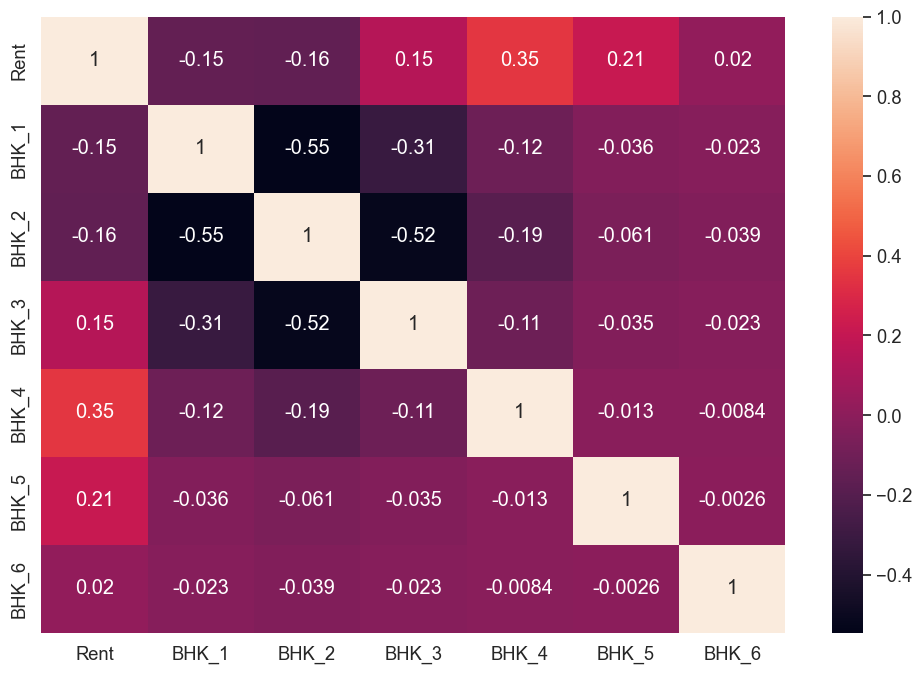

In [8]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True) 
plt.show()

In [9]:
features = df1.drop(['Rent'], axis = 1)
labels = df1['Rent']

In [10]:
features

,BHK_1,BHK_2,BHK_3,BHK_4,BHK_5,BHK_6
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
4741,0,1,0,0,0,0
4742,0,0,1,0,0,0
4743,0,0,1,0,0,0
4744,0,0,1,0,0,0


In [11]:
labels

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.5, random_state = 11)


In [13]:
X_train

,BHK_1,BHK_2,BHK_3,BHK_4,BHK_5,BHK_6
403,0,1,0,0,0,0
1652,1,0,0,0,0,0
2193,0,0,1,0,0,0
1503,0,1,0,0,0,0
2540,1,0,0,0,0,0
...,...,...,...,...,...,...
332,1,0,0,0,0,0
1293,0,1,0,0,0,0
4023,0,1,0,0,0,0
3775,0,1,0,0,0,0


In [14]:
y_train

403      9000
1652     7500
2193    28000
1503    13000
2540    16000
        ...  
332      6500
1293    80000
4023    16000
3775    11500
1945    22000
Name: Rent, Length: 2373, dtype: int64

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [16]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf

DecisionTreeClassifier(random_state=11)

In [17]:
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)

In [18]:
print(f"정확도 : {accuracy_score(y_test, pred)}")

정확도 : 0.06573957016434892


# 방 수에 따라 분류해야한다 생각해서 분류를 해야한다고 생각했는데 방수와 렌트값의 선형관계의 예측값을 알아야 하므로 회귀가 더 적합하다고 다시 생각했음

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

In [20]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(f"MSE : {mse}")

MSE : 2612794582.3430257


In [23]:
df1

,Rent,BHK_1,BHK_2,BHK_3,BHK_4,BHK_5,BHK_6
0,10000,0,1,0,0,0,0
1,20000,0,1,0,0,0,0
2,17000,0,1,0,0,0,0
3,10000,0,1,0,0,0,0
4,7500,0,1,0,0,0,0
...,...,...,...,...,...,...,...
4741,15000,0,1,0,0,0,0
4742,29000,0,0,1,0,0,0
4743,35000,0,0,1,0,0,0
4744,45000,0,0,1,0,0,0


In [27]:
new_column_name = {
    "Posted On" : "Posted_On",
    "BHK" : "BHK",
    "Rent" : "Rent",
    "Size" : "Size",
    "Floor" : "Floor",
    "Area Type" : "Area_Type",
    "Area Locality" : "Area_Locality",
    "City" : "City",
    "Furnishing Status" : "Furnishing_Status",
    "Tenant Preferred" : "Tenant_Preferred",
    "Bathroom" : "Bathroom",
    "Point of Contact" : "Point_of_Contact"
}

rent_df.rename(columns = new_column_name, inplace = True)

#변경된 컬럼 이름 확인
rent_df.head()

,BHK,Rent,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [28]:
rent_df.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1612\225257097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rent_df.corr()


,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


In [37]:
data = pd.read_csv('rent.csv')

In [38]:
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [53]:
X = data[['Size','Rent']]


In [54]:
X

,Size,Rent
0,1100,10000
1,800,20000
2,1000,17000
3,800,10000
4,850,7500
...,...,...
4741,1000,15000
4742,2000,29000
4743,1750,35000
4744,1500,45000


D:\AI_14_kjw\resorce\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


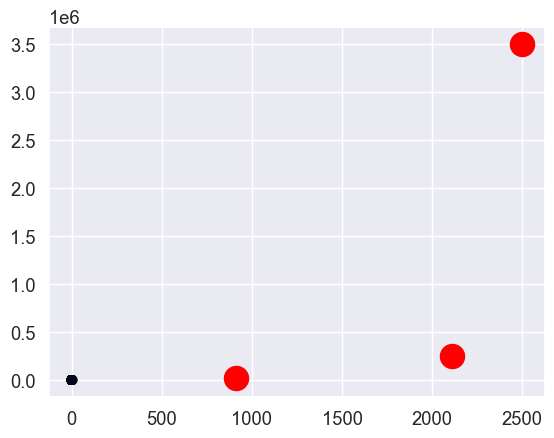

In [61]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
X = data[['Size','Rent']]
kmeans.fit(X[['Size', 'Rent']])
pred = kmeans.predict(X[['Size', 'Rent']])

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c ='red')
plt.show()

In [63]:
Y = data[['Bathroom', 'Rent']]

In [64]:
Y

,Bathroom,Rent
0,2,10000
1,1,20000
2,1,17000
3,1,10000
4,1,7500
...,...,...
4741,2,15000
4742,3,29000
4743,3,35000
4744,2,45000


D:\AI_14_kjw\resorce\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


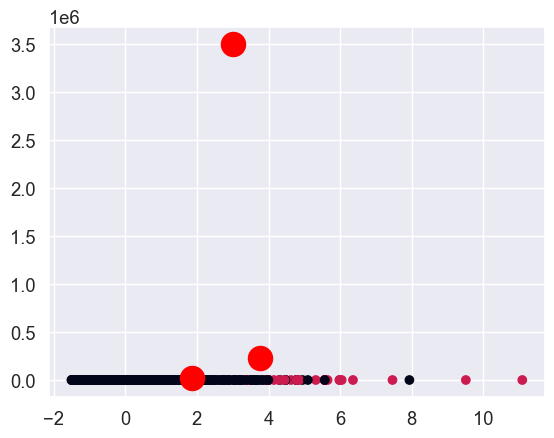

In [69]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
X = data[['Bathroom','Rent']]
kmeans.fit(X[['Bathroom', 'Rent']])
pred = kmeans.predict(X[['Bathroom', 'Rent']])

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c ='red')
plt.show()